In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import googlemaps
import folium
import json

# 전체 코드 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 서울시 총 생활인구

In [4]:
data=pd.read_csv('../[0]data/서울시_유동인구_현황.csv',index_col=1)
data

,ID,지역코드,총생활인구수,일최대인구수,일최소인구수,주간인구수,야간인구수,일최대이동인구수,자치구간이동인구수
기간코드,,,,,,,,,
19,0,111311,525648.333800,5.608381e+05,486834.137765,4.955308e+05,547160.827561,225552.328351,61246.224667
19,1,111191,411521.156281,4.292163e+05,396103.237973,4.211272e+05,404659.719519,221025.205901,104248.618389
18,2,111311,534523.856832,5.732555e+05,492938.403136,5.020498e+05,557299.064610,238774.634927,65213.029022
19,3,111171,285082.077517,3.091504e+05,257350.072825,2.645685e+05,299734.601757,138343.574267,40075.724514
18,4,111131,328479.224597,3.647013e+05,287681.654208,3.559063e+05,308629.964690,206633.510346,101345.236490
18,5,111212,568327.822212,6.047065e+05,531389.526657,5.407050e+05,587611.406055,266577.738426,65955.987369
19,6,111131,325658.389453,3.586690e+05,289521.158028,3.518261e+05,306967.166561,198216.366591,95850.826674
19,7,111261,851878.220641,1.047966e+06,678469.796159,1.005556e+06,742108.318596,612055.820835,297018.478358
18,8,111301,405548.573942,4.374377e+05,369614.504067,3.789423e+05,424234.570425,196049.251244,64485.372566


In [5]:
data["지역코드"].replace([111181,111191,111201,111301,111212,111221,111281,111231,111241,111273,111274,111123,111121,111131,111142,111141,111152,111161,111291,111171,111251,111262,111261,111151,111311],["은평구","서대문구","마포구","양천구","강서구","구로구","금천구","영등포구","동작구","송파구","강동구","종로구","중구","용산구","성동구","광진구","동대문구","성북구","강북구","도봉구","관악구","서초구","강남구","중랑구","노원구"], inplace=True)

In [6]:
data

,ID,지역코드,총생활인구수,일최대인구수,일최소인구수,주간인구수,야간인구수,일최대이동인구수,자치구간이동인구수
기간코드,,,,,,,,,
19,0,노원구,525648.333800,5.608381e+05,486834.137765,4.955308e+05,547160.827561,225552.328351,61246.224667
19,1,서대문구,411521.156281,4.292163e+05,396103.237973,4.211272e+05,404659.719519,221025.205901,104248.618389
18,2,노원구,534523.856832,5.732555e+05,492938.403136,5.020498e+05,557299.064610,238774.634927,65213.029022
19,3,도봉구,285082.077517,3.091504e+05,257350.072825,2.645685e+05,299734.601757,138343.574267,40075.724514
18,4,용산구,328479.224597,3.647013e+05,287681.654208,3.559063e+05,308629.964690,206633.510346,101345.236490
18,5,강서구,568327.822212,6.047065e+05,531389.526657,5.407050e+05,587611.406055,266577.738426,65955.987369
19,6,용산구,325658.389453,3.586690e+05,289521.158028,3.518261e+05,306967.166561,198216.366591,95850.826674
19,7,강남구,851878.220641,1.047966e+06,678469.796159,1.005556e+06,742108.318596,612055.820835,297018.478358
18,8,양천구,405548.573942,4.374377e+05,369614.504067,3.789423e+05,424234.570425,196049.251244,64485.372566


In [7]:
data.drop(["ID","일최대인구수","일최소인구수","주간인구수","야간인구수","일최대이동인구수","자치구간이동인구수"], axis = 1, inplace = True)

In [8]:
data

,지역코드,총생활인구수
기간코드,,
19,노원구,525648.333800
19,서대문구,411521.156281
18,노원구,534523.856832
19,도봉구,285082.077517
18,용산구,328479.224597
18,강서구,568327.822212
19,용산구,325658.389453
19,강남구,851878.220641
18,양천구,405548.573942


In [9]:
data2 = data.sort_values(by = '기간코드')

In [10]:
data2

,지역코드,총생활인구수
기간코드,,
18,광진구,417179.450926
18,관악구,526441.880830
18,성북구,460168.041831
18,마포구,514381.843400
18,서초구,629992.965351
18,서대문구,418592.774736
18,영등포구,531809.541763
18,도봉구,300143.294030
18,강북구,312569.807865


In [11]:
data18 = data2.iloc[0:25]

In [12]:
data18

,지역코드,총생활인구수
기간코드,,
18,광진구,417179.450926
18,관악구,526441.880830
18,성북구,460168.041831
18,마포구,514381.843400
18,서초구,629992.965351
18,서대문구,418592.774736
18,영등포구,531809.541763
18,도봉구,300143.294030
18,강북구,312569.807865


In [13]:
data19 = data2.iloc[25:]

In [14]:
data19

,지역코드,총생활인구수
기간코드,,
19,노원구,525648.333800
19,강서구,556005.823526
19,서초구,616147.837763
19,동대문구,391960.981110
19,관악구,512078.638561
19,강동구,487603.804884
19,성북구,447125.745706
19,은평구,445016.038489
19,구로구,425341.652219


## 서울시 5대 범죄

In [15]:
big5=pd.read_csv('../[0]data/서울시_5대범죄.csv',index_col=1)
big5

,ID,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,,
17,0,111261,7720,7,20,607,3130,3956
17,1,111231,5969,15,5,455,2304,3190
17,2,111273,5576,6,1,288,2274,3007
17,3,111251,5525,8,7,379,1979,3152
17,4,111201,5278,3,8,500,2094,2673
...,...,...,...,...,...,...,...,...
19,70,111281,3105,6,10,153,1157,1779
19,71,111191,2943,2,5,175,1226,1535
19,72,111161,2877,3,3,176,1082,1613


In [16]:
big5["지역코드"].replace([111181,111191,111201,111301,111212,111221,111281,111231,111241,111273,111274,111123,111121,111131,111142,111141,111152,111161,111291,111171,111251,111262,111261,111151,111311],["은평구","서대문구","마포구","양천구","강서구","구로구","금천구","영등포구","동작구","송파구","강동구","종로구","중구","용산구","성동구","광진구","동대문구","성북구","강북구","도봉구","관악구","서초구","강남구","중랑구","노원구"], inplace=True)

In [17]:
big5

,ID,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,,
17,0,강남구,7720,7,20,607,3130,3956
17,1,영등포구,5969,15,5,455,2304,3190
17,2,송파구,5576,6,1,288,2274,3007
17,3,관악구,5525,8,7,379,1979,3152
17,4,마포구,5278,3,8,500,2094,2673
...,...,...,...,...,...,...,...,...
19,70,금천구,3105,6,10,153,1157,1779
19,71,서대문구,2943,2,5,175,1226,1535
19,72,성북구,2877,3,3,176,1082,1613


In [18]:
big5.drop("ID", axis = 1, inplace = True)

In [19]:
big5

,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,
17,강남구,7720,7,20,607,3130,3956
17,영등포구,5969,15,5,455,2304,3190
17,송파구,5576,6,1,288,2274,3007
17,관악구,5525,8,7,379,1979,3152
17,마포구,5278,3,8,500,2094,2673
...,...,...,...,...,...,...,...
19,금천구,3105,6,10,153,1157,1779
19,서대문구,2943,2,5,175,1226,1535
19,성북구,2877,3,3,176,1082,1613


In [20]:
big5_17 = big5.iloc[0:25]

In [21]:
big5_17

,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,
17,강남구,7720,7,20,607,3130,3956
17,영등포구,5969,15,5,455,2304,3190
17,송파구,5576,6,1,288,2274,3007
17,관악구,5525,8,7,379,1979,3152
17,마포구,5278,3,8,500,2094,2673
17,강서구,5135,11,4,316,1888,2916
17,구로구,4895,7,8,328,1725,2827
17,서초구,4708,9,13,470,1812,2404
17,광진구,4646,6,13,261,2220,2146


In [22]:
big5_18 = big5.iloc[25:50]

In [23]:
big5_18

,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,
18,강남구,7513,10,14,600,3004,3885
18,영등포구,5840,17,8,391,2292,3132
18,송파구,5807,5,6,309,2352,3135
18,마포구,5172,6,6,473,2011,2676
18,관악구,5026,9,10,352,2012,2643
18,구로구,4810,8,9,250,1717,2826
18,서초구,4726,5,5,470,1851,2395
18,강서구,4629,11,6,269,1724,2619
18,중랑구,4288,4,3,174,1526,2581


In [24]:
big5_19 = big5.iloc[50:]

In [25]:
big5_19

,지역코드,합계,살인,강도,강간강제추행,절도,폭력
기간코드,,,,,,,
19,강남구,7304,5,5,666,2970,3658
19,영등포구,5820,10,3,356,2409,3042
19,송파구,5698,7,10,273,2416,2992
19,서초구,5542,5,7,616,2270,2644
19,관악구,5328,13,10,408,2223,2674
19,강서구,4924,8,3,306,2050,2557
19,마포구,4842,2,2,495,2190,2153
19,구로구,4707,10,3,226,1916,2552
19,중구,4327,2,6,195,2202,1922


In [26]:
big5_17['살인'].sum()
big5_17['강도'].sum()
big5_17['강간강제추행'].sum()
big5_17['절도'].sum()
big5_17['폭력'].sum()
print("--------")
big5_18['살인'].sum()
big5_18['강도'].sum()
big5_18['강간강제추행'].sum()
big5_18['절도'].sum()
big5_18['폭력'].sum()
print("--------")
big5_19['살인'].sum()
big5_19['강도'].sum()
big5_19['강간강제추행'].sum()
big5_19['절도'].sum()
big5_19['폭력'].sum()


142

169

6963

41162

59399

--------


143

143

6412

39175

56075

--------


136

136

6469

42204

54723

# 총 생활인구수 대비 5대범죄

In [27]:
merge18 = data18.merge(big5_18)

In [28]:
merge18

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력
0,광진구,417179.450926,3915,7,2,229,1769,1908
1,관악구,526441.880830,5026,9,10,352,2012,2643
2,성북구,460168.041831,3042,7,1,183,1164,1687
3,마포구,514381.843400,5172,6,6,473,2011,2676
4,서초구,629992.965351,4726,5,5,470,1851,2395
5,서대문구,418592.774736,2802,5,3,206,1062,1526
6,영등포구,531809.541763,5840,17,8,391,2292,3132
7,도봉구,300143.294030,2249,1,5,113,781,1349
8,강북구,312569.807865,3437,8,7,188,1112,2122
9,성동구,368086.713322,2457,2,5,126,999,1325


In [29]:
merge18["총생활인구수 대비 5대범죄 발생률"] = ((merge18["합계"]/merge18["총생활인구수"])*100).round(2)

In [30]:
merge18

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
0,광진구,417179.450926,3915,7,2,229,1769,1908,0.94
1,관악구,526441.880830,5026,9,10,352,2012,2643,0.95
2,성북구,460168.041831,3042,7,1,183,1164,1687,0.66
3,마포구,514381.843400,5172,6,6,473,2011,2676,1.01
4,서초구,629992.965351,4726,5,5,470,1851,2395,0.75
5,서대문구,418592.774736,2802,5,3,206,1062,1526,0.67
6,영등포구,531809.541763,5840,17,8,391,2292,3132,1.10
7,도봉구,300143.294030,2249,1,5,113,781,1349,0.75
8,강북구,312569.807865,3437,8,7,188,1112,2122,1.10
9,성동구,368086.713322,2457,2,5,126,999,1325,0.67


In [31]:
merge18.sort_values(by='총생활인구수 대비 5대범죄 발생률', ascending = False)

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
20,금천구,243654.693512,3293,6,7,200,1168,1912,1.35
13,중랑구,370736.019283,4288,4,3,174,1526,2581,1.16
12,구로구,434505.287846,4810,8,9,250,1717,2826,1.11
6,영등포구,531809.541763,5840,17,8,391,2292,3132,1.10
8,강북구,312569.807865,3437,8,7,188,1112,2122,1.10
17,중구,376548.376186,4030,2,11,207,1855,1955,1.07
19,용산구,328479.224597,3411,1,3,331,1096,1980,1.04
23,종로구,357385.477412,3690,6,3,236,1483,1962,1.03
3,마포구,514381.843400,5172,6,6,473,2011,2676,1.01
1,관악구,526441.880830,5026,9,10,352,2012,2643,0.95


In [32]:
merge19 = data19.merge(big5_19)

In [33]:
merge19

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력
0,노원구,525648.333800,4153,4,3,184,1498,2464
1,강서구,556005.823526,4924,8,3,306,2050,2557
2,서초구,616147.837763,5542,5,7,616,2270,2644
3,동대문구,391960.981110,3692,6,10,168,1531,1977
4,관악구,512078.638561,5328,13,10,408,2223,2674
5,강동구,487603.804884,4014,6,15,180,1650,2163
6,성북구,447125.745706,2877,3,3,176,1082,1613
7,은평구,445016.038489,3880,3,1,194,1565,2117
8,구로구,425341.652219,4707,10,3,226,1916,2552
9,종로구,339373.245964,3846,4,7,238,1515,2082


In [34]:
merge19["총생활인구수 대비 5대범죄 발생률"] = ((merge19["합계"]/merge19["총생활인구수"])*100).round(2)

In [35]:
merge19

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
0,노원구,525648.333800,4153,4,3,184,1498,2464,0.79
1,강서구,556005.823526,4924,8,3,306,2050,2557,0.89
2,서초구,616147.837763,5542,5,7,616,2270,2644,0.90
3,동대문구,391960.981110,3692,6,10,168,1531,1977,0.94
4,관악구,512078.638561,5328,13,10,408,2223,2674,1.04
5,강동구,487603.804884,4014,6,15,180,1650,2163,0.82
6,성북구,447125.745706,2877,3,3,176,1082,1613,0.64
7,은평구,445016.038489,3880,3,1,194,1565,2117,0.87
8,구로구,425341.652219,4707,10,3,226,1916,2552,1.11
9,종로구,339373.245964,3846,4,7,238,1515,2082,1.13


In [36]:
merge19.sort_values(by='총생활인구수 대비 5대범죄 발생률', ascending = False)

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
14,금천구,238993.357166,3105,6,10,153,1157,1779,1.30
10,강북구,304014.644142,3838,6,3,176,1229,2424,1.26
18,중구,365234.358105,4327,2,6,195,2202,1922,1.18
16,중랑구,361735.178976,4268,10,4,138,1666,2450,1.18
23,영등포구,514583.011491,5820,10,3,356,2409,3042,1.13
9,종로구,339373.245964,3846,4,7,238,1515,2082,1.13
8,구로구,425341.652219,4707,10,3,226,1916,2552,1.11
4,관악구,512078.638561,5328,13,10,408,2223,2674,1.04
20,용산구,325658.389453,3313,3,3,272,999,2036,1.02
12,광진구,405280.463129,4011,4,6,273,1875,1853,0.99


# bar 차트 

In [37]:
merge18.sort_values(by='총생활인구수 대비 5대범죄 발생률', ascending = False).head(5)

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
20,금천구,243654.693512,3293,6,7,200,1168,1912,1.35
13,중랑구,370736.019283,4288,4,3,174,1526,2581,1.16
12,구로구,434505.287846,4810,8,9,250,1717,2826,1.11
6,영등포구,531809.541763,5840,17,8,391,2292,3132,1.10
8,강북구,312569.807865,3437,8,7,188,1112,2122,1.10


In [38]:
merge18.sort_values(by='총생활인구수 대비 5대범죄 발생률', ascending = False).tail(5)

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
22,송파구,775496.445394,5807,5,6,309,2352,3135,0.75
10,동작구,431005.613008,3100,3,7,288,1151,1651,0.72
9,성동구,368086.713322,2457,2,5,126,999,1325,0.67
5,서대문구,418592.774736,2802,5,3,206,1062,1526,0.67
2,성북구,460168.041831,3042,7,1,183,1164,1687,0.66


In [39]:
abcd = merge18.sort_values(by='총생활인구수 대비 5대범죄 발생률', ascending = False)

In [40]:
abcd

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
20,금천구,243654.693512,3293,6,7,200,1168,1912,1.35
13,중랑구,370736.019283,4288,4,3,174,1526,2581,1.16
12,구로구,434505.287846,4810,8,9,250,1717,2826,1.11
6,영등포구,531809.541763,5840,17,8,391,2292,3132,1.10
8,강북구,312569.807865,3437,8,7,188,1112,2122,1.10
17,중구,376548.376186,4030,2,11,207,1855,1955,1.07
19,용산구,328479.224597,3411,1,3,331,1096,1980,1.04
23,종로구,357385.477412,3690,6,3,236,1483,1962,1.03
3,마포구,514381.843400,5172,6,6,473,2011,2676,1.01
1,관악구,526441.880830,5026,9,10,352,2012,2643,0.95


# 2018년 대비 2019년 증감률(%)

In [41]:
merge18

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
0,광진구,417179.450926,3915,7,2,229,1769,1908,0.94
1,관악구,526441.880830,5026,9,10,352,2012,2643,0.95
2,성북구,460168.041831,3042,7,1,183,1164,1687,0.66
3,마포구,514381.843400,5172,6,6,473,2011,2676,1.01
4,서초구,629992.965351,4726,5,5,470,1851,2395,0.75
5,서대문구,418592.774736,2802,5,3,206,1062,1526,0.67
6,영등포구,531809.541763,5840,17,8,391,2292,3132,1.10
7,도봉구,300143.294030,2249,1,5,113,781,1349,0.75
8,강북구,312569.807865,3437,8,7,188,1112,2122,1.10
9,성동구,368086.713322,2457,2,5,126,999,1325,0.67


In [42]:
merge19

,지역코드,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
0,노원구,525648.333800,4153,4,3,184,1498,2464,0.79
1,강서구,556005.823526,4924,8,3,306,2050,2557,0.89
2,서초구,616147.837763,5542,5,7,616,2270,2644,0.90
3,동대문구,391960.981110,3692,6,10,168,1531,1977,0.94
4,관악구,512078.638561,5328,13,10,408,2223,2674,1.04
5,강동구,487603.804884,4014,6,15,180,1650,2163,0.82
6,성북구,447125.745706,2877,3,3,176,1082,1613,0.64
7,은평구,445016.038489,3880,3,1,194,1565,2117,0.87
8,구로구,425341.652219,4707,10,3,226,1916,2552,1.11
9,종로구,339373.245964,3846,4,7,238,1515,2082,1.13


In [43]:
merge18.set_index('지역코드', inplace = True)

In [44]:
merge18_new = merge18.sort_values(by = '지역코드')

In [45]:
merge18_new

,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
지역코드,,,,,,,,
강남구,856503.999326,7513,10,14,600,3004,3885,0.88
강동구,495728.008865,3919,3,7,170,1515,2224,0.79
강북구,312569.807865,3437,8,7,188,1112,2122,1.10
강서구,568327.822212,4629,11,6,269,1724,2619,0.81
관악구,526441.880830,5026,9,10,352,2012,2643,0.95
광진구,417179.450926,3915,7,2,229,1769,1908,0.94
구로구,434505.287846,4810,8,9,250,1717,2826,1.11
금천구,243654.693512,3293,6,7,200,1168,1912,1.35
노원구,534523.856832,4007,5,5,194,1422,2381,0.75


In [46]:
merge18_new.drop(["합계","살인","강도","강간강제추행","절도","폭력"], axis = 1, inplace = True)

In [47]:
merge18_new

,총생활인구수,총생활인구수 대비 5대범죄 발생률
지역코드,,
강남구,856503.999326,0.88
강동구,495728.008865,0.79
강북구,312569.807865,1.10
강서구,568327.822212,0.81
관악구,526441.880830,0.95
광진구,417179.450926,0.94
구로구,434505.287846,1.11
금천구,243654.693512,1.35
노원구,534523.856832,0.75


In [48]:
merge18_new.columns = ['2018 총생활인구수', '2018 총생활인구 수 대비 5대범죄 발생률']

In [49]:
merge18_new

,2018 총생활인구수,2018 총생활인구 수 대비 5대범죄 발생률
지역코드,,
강남구,856503.999326,0.88
강동구,495728.008865,0.79
강북구,312569.807865,1.10
강서구,568327.822212,0.81
관악구,526441.880830,0.95
광진구,417179.450926,0.94
구로구,434505.287846,1.11
금천구,243654.693512,1.35
노원구,534523.856832,0.75


In [50]:
merge19.set_index('지역코드', inplace = True)

In [51]:
merge19_new = merge19.sort_values(by = '지역코드')

In [52]:
merge19_new

,총생활인구수,합계,살인,강도,강간강제추행,절도,폭력,총생활인구수 대비 5대범죄 발생률
지역코드,,,,,,,,
강남구,851878.220641,7304,5,5,666,2970,3658,0.86
강동구,487603.804884,4014,6,15,180,1650,2163,0.82
강북구,304014.644142,3838,6,3,176,1229,2424,1.26
강서구,556005.823526,4924,8,3,306,2050,2557,0.89
관악구,512078.638561,5328,13,10,408,2223,2674,1.04
광진구,405280.463129,4011,4,6,273,1875,1853,0.99
구로구,425341.652219,4707,10,3,226,1916,2552,1.11
금천구,238993.357166,3105,6,10,153,1157,1779,1.30
노원구,525648.333800,4153,4,3,184,1498,2464,0.79


In [53]:
merge19_new.drop(["합계","살인","강도","강간강제추행","절도","폭력"], axis = 1, inplace = True)

In [54]:
merge19_new

,총생활인구수,총생활인구수 대비 5대범죄 발생률
지역코드,,
강남구,851878.220641,0.86
강동구,487603.804884,0.82
강북구,304014.644142,1.26
강서구,556005.823526,0.89
관악구,512078.638561,1.04
광진구,405280.463129,0.99
구로구,425341.652219,1.11
금천구,238993.357166,1.30
노원구,525648.333800,0.79


In [55]:
merge19_new.columns = ['2019 총생활인구수','2019 총생활인구 수 대비 5대범죄 발생률']

In [56]:
merge19_new

,2019 총생활인구수,2019 총생활인구 수 대비 5대범죄 발생률
지역코드,,
강남구,851878.220641,0.86
강동구,487603.804884,0.82
강북구,304014.644142,1.26
강서구,556005.823526,0.89
관악구,512078.638561,1.04
광진구,405280.463129,0.99
구로구,425341.652219,1.11
금천구,238993.357166,1.30
노원구,525648.333800,0.79


In [57]:
percentage = pd.concat([merge18_new, merge19_new], axis = 1)

In [58]:
percentage

,2018 총생활인구수,2018 총생활인구 수 대비 5대범죄 발생률,2019 총생활인구수,2019 총생활인구 수 대비 5대범죄 발생률
지역코드,,,,
강남구,856503.999326,0.88,851878.220641,0.86
강동구,495728.008865,0.79,487603.804884,0.82
강북구,312569.807865,1.10,304014.644142,1.26
강서구,568327.822212,0.81,556005.823526,0.89
관악구,526441.880830,0.95,512078.638561,1.04
광진구,417179.450926,0.94,405280.463129,0.99
구로구,434505.287846,1.11,425341.652219,1.11
금천구,243654.693512,1.35,238993.357166,1.30
노원구,534523.856832,0.75,525648.333800,0.79


In [59]:
percentage['5대범죄 증감률'] = ((percentage['2019 총생활인구 수 대비 5대범죄 발생률'] - percentage['2018 총생활인구 수 대비 5대범죄 발생률'])/percentage['2018 총생활인구 수 대비 5대범죄 발생률']*100).round(2)

In [60]:
percentage['총생활인구 수 증감률'] = ((percentage['2019 총생활인구수'] - percentage['2018 총생활인구수'])/percentage['2018 총생활인구수']*100).round(2)

In [61]:
percentage

,2018 총생활인구수,2018 총생활인구 수 대비 5대범죄 발생률,2019 총생활인구수,2019 총생활인구 수 대비 5대범죄 발생률,5대범죄 증감률,총생활인구 수 증감률
지역코드,,,,,,
강남구,856503.999326,0.88,851878.220641,0.86,-2.27,-0.54
강동구,495728.008865,0.79,487603.804884,0.82,3.80,-1.64
강북구,312569.807865,1.10,304014.644142,1.26,14.55,-2.74
강서구,568327.822212,0.81,556005.823526,0.89,9.88,-2.17
관악구,526441.880830,0.95,512078.638561,1.04,9.47,-2.73
광진구,417179.450926,0.94,405280.463129,0.99,5.32,-2.85
구로구,434505.287846,1.11,425341.652219,1.11,0.00,-2.11
금천구,243654.693512,1.35,238993.357166,1.30,-3.70,-1.91
노원구,534523.856832,0.75,525648.333800,0.79,5.33,-1.66


In [62]:
z = percentage.sort_values(by = '5대범죄 증감률', ascending = False)

In [63]:
z

,2018 총생활인구수,2018 총생활인구 수 대비 5대범죄 발생률,2019 총생활인구수,2019 총생활인구 수 대비 5대범죄 발생률,5대범죄 증감률,총생활인구 수 증감률
지역코드,,,,,,
서초구,629992.965351,0.75,616147.837763,0.90,20.00,-2.20
강북구,312569.807865,1.10,304014.644142,1.26,14.55,-2.74
동작구,431005.613008,0.72,421077.750351,0.81,12.50,-2.30
중구,376548.376186,1.07,365234.358105,1.18,10.28,-3.00
은평구,455552.167154,0.79,445016.038489,0.87,10.13,-2.31
강서구,568327.822212,0.81,556005.823526,0.89,9.88,-2.17
종로구,357385.477412,1.03,339373.245964,1.13,9.71,-5.04
관악구,526441.880830,0.95,512078.638561,1.04,9.47,-2.73
서대문구,418592.774736,0.67,411521.156281,0.72,7.46,-1.69


<Figure size 1296x720 with 0 Axes>

<BarContainer object of 25 artists>

Text(0.5, 1.0, '<전년 대비 2019년 5대 범죄 및 총생활인구 수 증감률(%)>')

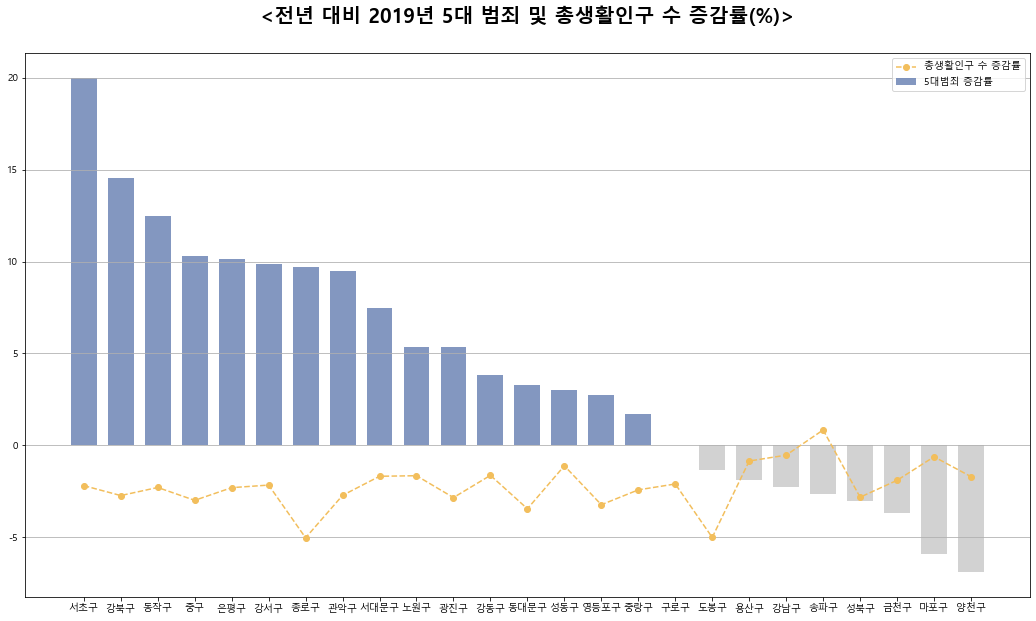

In [64]:
plt.figure(figsize=(18,10))
plt.bar(z.index,z['5대범죄 증감률'],color=('#4E6BA6', '#4E6BA6','#4E6BA6','#4E6BA6','#4E6BA6','#4E6BA6', '#4E6BA6','#4E6BA6','#4E6BA6','#4E6BA6','#4E6BA6', '#4E6BA6','#4E6BA6','#4E6BA6','#4E6BA6','#4E6BA6', 'silver','silver','silver','silver','silver','silver','silver','silver','silver'),alpha=0.7,width=0.7, label='5대범죄 증감률')
plt.title('<전년 대비 2019년 5대 범죄 및 총생활인구 수 증감률(%)>',fontsize=20,pad=30,fontweight="bold")
plt.grid(True,axis='y')

plt.plot(z.index, z['총생활인구 수 증감률'], color='#F2BE5C', linestyle='--', marker='o', label='총생활인구 수 증감률')
plt.legend()
plt.savefig('../[1]시각화/시각화_19년_5대범죄_총생활인구_증감률.png')

plt.show()